# Car Price prediction

## Dataset Contains:
1. Car Brand 
1. Year
1. Sold Price
1. Present Price
1. Kms Driven 
1. Fuel Type
1. Seller Type
1. Transmission Type
1. Owners

### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

from sklearn import metrics

### data collection

Link: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=car+data.csv

In [2]:
car_data = pd.read_csv('./data/car_data.csv')

In [3]:
car_data.shape

(301, 9)

In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
car_data.isnull().sum(axis=0)

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

#### Categorical data

In [8]:
print(car_data["Fuel_Type"].value_counts())
print(car_data["Seller_Type"].value_counts())
print(car_data["Transmission"].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [9]:
# data preprocessing

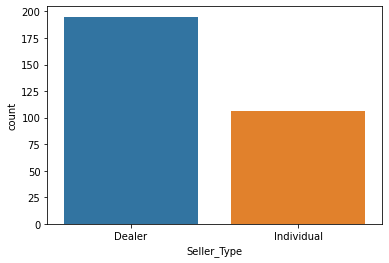

In [10]:
sns.countplot(x='Seller_Type', data=car_data)
plt.show()

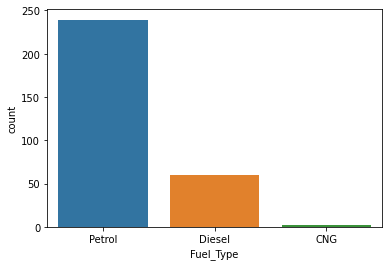

In [11]:
sns.countplot(x='Fuel_Type', data=car_data)
plt.show()

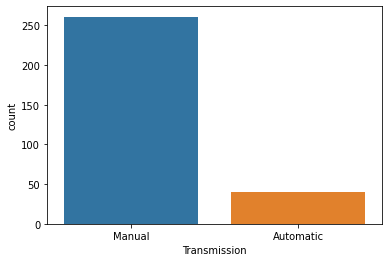

In [12]:
sns.countplot(x='Transmission', data=car_data)
plt.show()

In [13]:
# Encoding 
ohe = OneHotEncoder()
transformed = ohe.fit_transform(car_data[['Transmission','Seller_Type','Fuel_Type']])

In [14]:
transformer = make_column_transformer(
    (OneHotEncoder(), ['Transmission', 'Seller_Type','Fuel_Type']),
    remainder='passthrough')

In [15]:
transformed = transformer.fit_transform(car_data)
columns=transformer.get_feature_names_out()

final_columns=[]
columns=transformer.get_feature_names_out()
for c in columns:
    if c.startswith("onehotencoder__"):
        final_columns.append(c.replace("onehotencoder__",''))
    elif c.startswith("remainder__"):
        final_columns.append(c.replace("remainder__",''))
    
transformed_df = pd.DataFrame(transformed, columns=final_columns)
transformed_df.head()

,Transmission_Automatic,Transmission_Manual,Seller_Type_Dealer,Seller_Type_Individual,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,ritz,2014,3.35,5.59,27000,0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,sx4,2013,4.75,9.54,43000,0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,ciaz,2017,7.25,9.85,6900,0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,wagon r,2011,2.85,4.15,5200,0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,swift,2014,4.6,6.87,42450,0


In [16]:
transformed_df.shape

(301, 13)

### train test split

In [17]:
X_train,X_test,y_train,y_test = train_test_split(
    transformed_df.drop(["Car_Name","Selling_Price"],axis=1),
    transformed_df["Selling_Price"],
    test_size=0.15
)

In [18]:
X_train.shape,X_test.shape

((255, 11), (46, 11))

In [19]:
X_train.head()

,Transmission_Automatic,Transmission_Manual,Seller_Type_Dealer,Seller_Type_Individual,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Year,Present_Price,Kms_Driven,Owner
9,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2015,8.92,42367,0
226,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2015,5.7,24678,0
98,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2013,18.61,45000,0
209,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2015,5.7,21125,0
52,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2017,19.77,15000,0


In [20]:
y_train

9       7.45
226     5.25
98      7.05
209     4.85
52      18.0
       ...  
96     20.75
287     5.75
283     8.99
156     0.48
274      5.3
Name: Selling_Price, Length: 255, dtype: object

### model training and evaluation

In [21]:
lin_reg = LinearRegression()
lasso_reg = Lasso()
rf_reg = RandomForestRegressor()

voting_reg = VotingRegressor(estimators=[('linr',lin_reg),
                                         ('lasr',lasso_reg),
                                        ('rf',rf_reg)
                                        ])

In [45]:
for reg in (lin_reg,lasso_reg,rf_reg,voting_reg):
    reg.fit(X_train,y_train)
    y_pred_train = reg.predict(X_train)
    y_pred_test = reg.predict(X_test)
    print(reg.__class__.__name__,metrics.r2_score(y_train,y_pred_train))
    print("  ",metrics.r2_score(y_test,y_pred_test))


LinearRegression 0.8912284767055275
   0.7929892194012877
Lasso 0.8496413825282205
   0.7885261314995645
RandomForestRegressor 0.9871332440461161
   0.8649292847728216
VotingRegressor 0.9414545219575208
   0.8395049304749921
